### Bibliotecas

In [1]:
%matplotlib notebook

import numpy as np

from scipy import optimize

from pymoo.problems.functional import FunctionalProblem
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter

import matplotlib
import matplotlib.pyplot as plt

from tqdm import tqdm

import locale
locale.setlocale(locale.LC_NUMERIC, "pt_BR");

### Graphics font properties

In [2]:
fontsize = 10

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
    "mathtext.fontset": "dejavuserif",
    "font.size": fontsize,
})

### Problemas

In [3]:
def problema1(x):
    f1 = x**2
    f2 = (x - 2.0)**2
    
    return np.array([f1, f2])

def problema2(x):
    a = 0.1
    b = 3.0
    
    f1 = x[0]
    f2 = 1.0 + x[1]**2 - x[0] - a * np.sin(b * np.pi * x[0])
    
    return np.array([f1, f2])

### Soma ponderada

In [4]:
def F(x, w1, w2, problema):
    return w1 * problema(x)[0] + w2 * problema(x)[1]

def soma_ponderada(problema, n):
    w = np.linspace(0.0, 1.0, n)
    
    if problema == problema1:
        limites = np.array([[-1e3, 1e3]])
        x_opt = np.zeros(n)
    elif problema == problema2:
        limites = np.array([[0.0, 1.0], [-2.0, 2.0]])
        x_opt = np.zeros((n, 2))
    
    for k, w1 in tqdm(enumerate(w)):
        w2 = 1 - w1
        
        p_opt = optimize.differential_evolution(
            func=F,
            bounds=limites,
            args=(w1, w2, problema),
            popsize=50,
            strategy="best1bin",
            tol=1e-12,
            recombination=0.95,
            mutation=0.6,
            maxiter=1000
        )
        
        x_opt[k] = p_opt.x
        
    return x_opt

### Testes

100it [00:33,  2.97it/s]


<IPython.core.display.Javascript object>


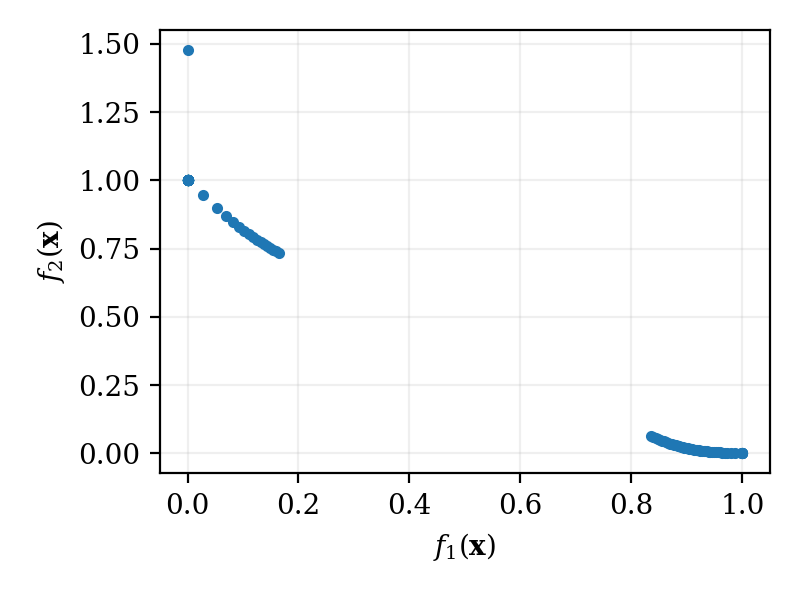

In [5]:
def rodar_test(problema, n):
    x_opt = soma_ponderada(problema, n)

    f_opt = np.zeros((n, 2))
    for k, x in enumerate(x_opt):
        if problema == problema1:
            f_opt[k, :] = problema1(x)
        elif problema == problema2:
            f_opt[k, :] = problema2(x)
            
    fig, ax = plt.subplots(figsize=(4, 3))
    ax.plot(f_opt[:, 0], f_opt[:, 1], "o", markersize=3)
    
    ax.set_xlabel(r"$f_1 (\mathbf{x})$")
    ax.set_ylabel(r"$f_2 (\mathbf{x})$")
    
    ax.grid(alpha=0.2)
    
    fig.tight_layout()
    
rodar_test(problema2, 100)

### Benchmark

<IPython.core.display.Javascript object>


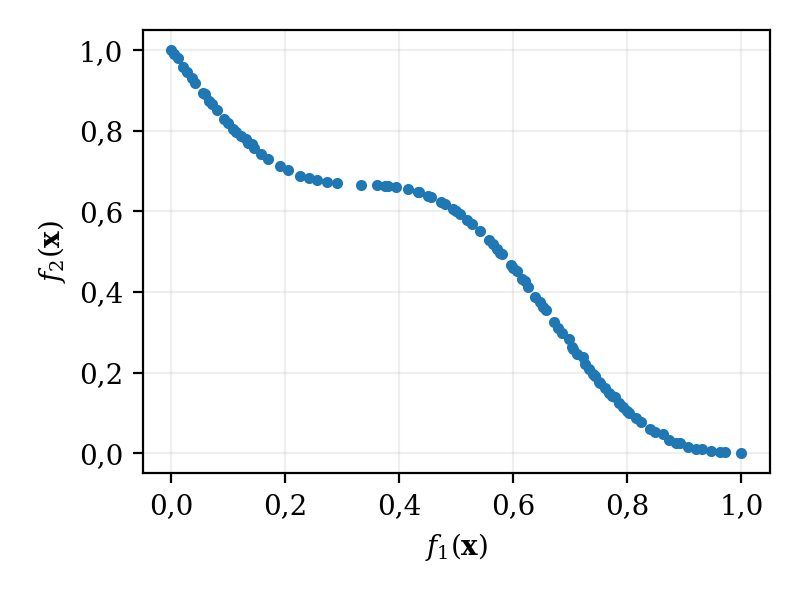

In [6]:
objs = [
    lambda x: x[0],
    lambda x: 1.0 + x[1]**2 - x[0] - 0.1 * np.sin(3.0 * np.pi * x[0])
]

n_var = 2

problem = FunctionalProblem(n_var,
                            objs,
                            xl=np.array([0.0, -2.0]),
                            xu=np.array([1.0, 2.0])
                            )

algorithm = NSGA2(pop_size=100)

res = minimize(problem,
               algorithm,
               ("n_gen", 200),
               verbose=False)

F = res.F

plt.rcParams['axes.formatter.use_locale'] = True
fig, ax = plt.subplots(figsize=(4, 3))

ax.plot(F[:, 0], F[:, 1], "o", markersize=3)

ax.set_xlabel(r"$f_1 (\mathbf{x})$")
ax.set_ylabel(r"$f_2 (\mathbf{x})$")

ax.grid(alpha=0.2)

fig.tight_layout()